Cuaderno de trabajo de:
 - _Piloto_ : Nombre1 Apellido1 (username con el que os habéis logueado)
 - _Copiloto_ : Nombre2 Apellido2 [escribe el username2]

In [5]:
%matplotlib inline
import random

import numpy as np
import scipy as sc
import scipy.stats as st

import seaborn
import matplotlib.pyplot as plt

#importamos el fichero plot_prob.py que debe de estar en la misma
# carpeta que este cuaderno
from plot_prob import plot_samples_discrete, plot_discrete_dist

## Distribuciones de probabilidad en `scipy.stats`

 - 1. Un objeto representa la distribución de probabilidad
    + `B = st.bernoulli(p=p0)` para $B\sim Bernoulli(p)$
    + `T = st.binom(n=n0, p=p0)` para $T\sim Binomial(p, n)$
    + `N = st.norm(loc=mean, scale=std)` para $N\sim Normal(\mu=\texttt{mean}, \sigma=\texttt{std})$
    + `E = st.expon(scale=1/l)` para $E\sim Exponencial(l)$, exponencial con tasa del proceso de Poisson igual a `l` (algunas veces los parámetros no son los mismos a los que estamos acostumbrados).
    + Muchas otras...

 - 2. Los métodos del objeto `scipy.stats` permiten obtener las cantidades que necesitamos:
    + Muestra aleatoria de tamaño `M`: `N.rvs(M)`
    + Media: `N.mean()`
    + Varianza: `N.var()`
    + Función de distribución evaluada en los puntos `xs` (array): `N.cdf(xs)`
    + Función de densidad evaluada en los puntos `xs` (si es continua): `N.pdf(xs)`
    + Función de masa evaluada en los puntos `xs` (si es discreta): `T.pmf(xs)`
    + Percentiles `ps`: `N.ppf(ps)`


## Distribuciones discretas

En esta clase vamos a centrarnos en distribuciones de probabilidad discretas, y lo primero que vamos a hacer es intentar entender la relación entre la ley de distribución de probabilidad, y las frecuencias con las que nos encontramos cada posible resultado.


### Distribución de Bernoulli

Un experimento aleatorio *sigue una distribución de Bernoulli* si hay dos posibles resultados:

  - 0, con probabilidad 1-p
  - 1, con probabilidad p

Cualquier experimento aleatorio con dos resultados se puede representar mediante una distribución de Bernouilli asignando a uno de los dos posibles resultados el valor 0 y al otro, el valor 1:

  - Hacemos una salida con el barco, anotamos "1" si vemos algún cetáceo, "0" en otro caso. Si la probabilidad de avistamiento es del 5%, es una Bernoulli con p=0,05.
  - En cada día de operación, anotamos "**1**" si el sistema de comunicación *falla*, "0" si funciona. Si la probabilidad de fallo es del 10%, es una Bernoulli con p=0,1.
  - En cada día de operación, anotamos "**0**" si el sistema de comunicación *falla*, "1" si funciona. Si la probabilidad de fallo es del 10%, es una Bernoulli con p=0,9.

In [6]:
#La distribución depende de un parametro
p0 = 0.25
#El objeto Ber contiene los metodos asociados a una 
#distribucion concreta de la familia Bernoulli
Ber = st.bernoulli(p=p0)

La **función de masa** de una distribución de probabilidad indica la probabilidad de obtener cada posible resultado.

``Ber.pmf(0)`` es la probabilidad de obtener ``0`` y ``Ber.pmf(1)`` es la probabilidad de obtener ``1``.

In [7]:
#Usando Ber.pmf, podemos ver cuál es la probabilidad de 
#obtener 0, o de obtener 1
print(Ber.pmf(0), Ber.pmf(1))

0.75 0.25


In [8]:
Ber.pmf(2)

0.0

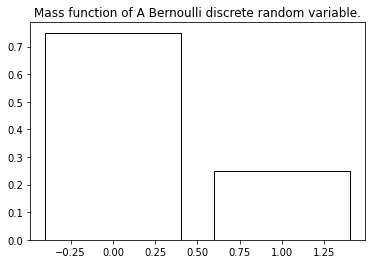

In [9]:
# Esta función dibuja la función de masa como diagrama de barras
plot_discrete_dist(Ber)

Una extracción aleatoria de la distribución nos devuelve un número aleatorio en el espacio muestral de la distribución, pero de tal forma que cuando hacemos muchas extracciones cada resultado aparece una proporción de veces parecida a la probabilidad que le asigna la funcion de masa.

``Ber.rvs(N)`` devuelve un array con ``N`` extracciones aleatorias independientes de la distribución ``Ber`` (una *muestra*).

In [10]:
#Cada vez que ejecutas esta celda, el resultado varía
muestra = Ber.rvs(20)
muestra

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1])

In [11]:
# ATENCION: no hay que fijar la semilla aleatoria con random.seed, 
#sino con np.random.seed(semilla)
#random.seed(12)
np.random.seed(12)
muestra = Ber.rvs(20)
muestra

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0])

#### Histogramas

Un [Histograma](https://es.wikipedia.org/wiki/Histograma) es una representación gráfica de una serie de datos en forma de barras, donde la superficie de cada barra es proporcional a la frecuencia de los valores representados.

Comparamos la distribución teórica con el histograma de una muestra aleatoria de distintos tamaños.

Si extraemos una muestra pequeña, el histograma de la muestra no se parece demasiado a la distribución de probabilidad que hemos usado para obtener la muestra.

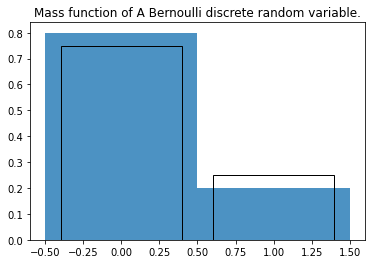

In [15]:
#Ejecutalo varias veces y veras como la forma cambia
#A veces se parece más, otras veces menos
muestra = Ber.rvs(10)
plt.hist(muestra, bins=[-0.5,0.5,1.5], density=1,alpha=0.8)
plot_discrete_dist(Ber)
plt.show()

Pero si aumentamos el tamaño de la muestra aleatoria se parece mucho mas a la función de masa.

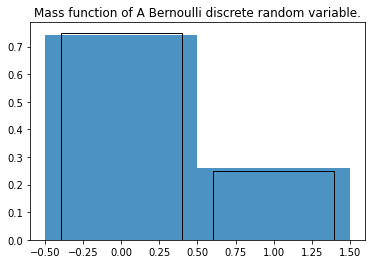

In [16]:
#Pero si aumentamos el tamanyo se parece mucho mas
muestra = Ber.rvs(1000)
plt.hist(muestra, bins=[-0.5,0.5,1.5], density=1,alpha=0.8)
plot_discrete_dist(Ber)
plt.show()

### Distribución binomial

Tenemos un experimento de Bernoulli con probabilidad **p**:

  - 0, con probabilidad 1-p
  - 1, con probabilidad p

**Repetimos el experimento** **n** veces de forma independiente, y anotamos *cuántas veces hemos ganado*.

El **espacio muestral** son los números naturales entre 0 y n.

Depende de dos parámetros:
 - La probabilidad **p** de ganar cada juego individual.
 - El número total de veces **n** que jugamos.

Puedes encontrar más información sobre la [distribución binomial en la wikipedia](https://en.wikipedia.org/wiki/Binomial_distribution)

In [19]:
#La distribución depende de dos parametros
p0 = 0.2
n0 = 10
#El objeto B contiene los metodos asociados a una distribucion concreta de la familia binomial
B = st.binom(n=n0, p=p0)

La **función de masa** de la distribución binomial indica la probabilidad de ganar 0, 1, 2 ... hasta el máximo de **n** veces.

Si ``B`` es la distribución, ``B.pmf(k)`` es la probabilidad del valor ``k``.

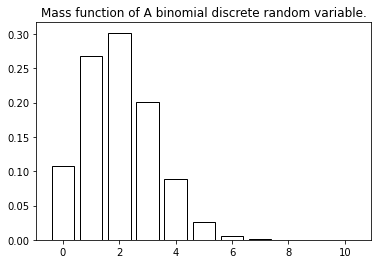

In [20]:
plot_discrete_dist(B, span=(0,10))

``B.rvs(n)`` devuelve un array con n extracciones aleatorias independientes de la distribución ``B``.

In [12]:
#Cada vez que ejecutas esta celda, el resultado varía
muestra = B.rvs(20)
muestra

array([0, 1, 0, 1, 2, 2, 2, 2, 0, 1, 2, 4, 2, 2, 2, 2, 4, 1, 3, 2])

Comparemos el histograma de una muestra aleatoria de tamaño pequeño con las probabilidades de la función de masa...

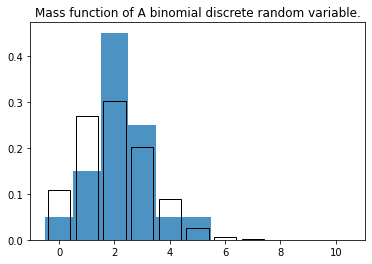

In [26]:
np.random.seed(6)
muestra = B.rvs(20)
plt.hist(muestra, bins=[k+0.5 for k in range(-1,n0+1)], density=1,alpha=0.8)
plot_discrete_dist(B, span=(0,10))
plt.show()

Si aumentamos el tamaño de la muestra aleatoria se parece mucho mas a la función de masa.

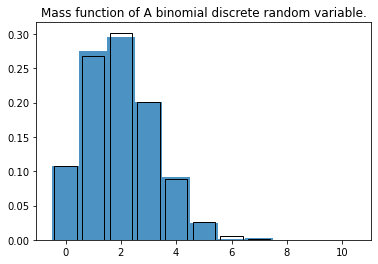

In [28]:
#Pero si aumentamos el tamaño se parece mucho más
np.random.seed(7)
muestra = B.rvs(1000)
plt.hist(muestra, bins=[k+0.5 for k in range(-1,n0+1)], density=1,alpha=0.8)
plot_discrete_dist(B, span=(0,10))
plt.show()

#### Simulando *a capela*

En este caso sabemos generar nosotros la muestra mediante una **simulación**, usando únicamente el generador de números aleatorios de la CPU (random.random).

 - Primero escribimos una función que corresponde a una jugada:
   - Extraemos un número aleatorio entre 0 y 1 mediante ``random.random()``.
   - Si ese número es menor que p (cosa que ocurre una proporción **p** de las veces), devolvemos 1 (éxito) y 0 en otro caso.

 - Después simulamos el resultado de jugar n veces de forma independiente y sumando los resultados.

In [30]:
def jugada(p):
    t = random.random()
    return t < p

def extraccion_aleatoria_binomial(p, n):
    resultados = [jugada(p) for j in range(n)]
    return sum(resultados)

def muestra_aleatoria_binomial(p, n, K):
    return [extraccion_aleatoria_binomial(p, n)
            for _ in range(K)]

muestra_aleatoria_binomial(0.9, 100, 5)

[91, 88, 87, 85, 95]

In [31]:
B = st.binom( n=100, p=0.9)
B.rvs(5)

array([94, 88, 91, 88, 84])

Comparamos una muestra aleatoria _"casera"_ de `muestra_aleatoria_binomial` con la función de masa de la distribución Binomial:

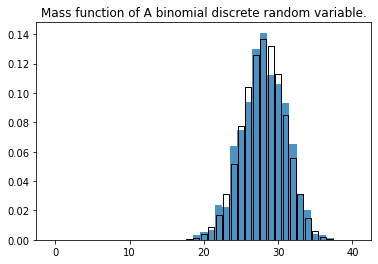

In [36]:
np.random.seed(7)
n0, p0 = 40, 0.7
B = st.binom(n=n0, p=p0)
N = 1000
muestra = muestra_aleatoria_binomial(p0, n0, N)
plt.hist(muestra, bins=[k+0.5 for k in range(-1,n0+1)], density=1,alpha=0.8)
plot_discrete_dist(B, span=(0,n0))
plt.show()

### Distribución geométrica

Repetimos un experimento aleatorio de Bernoulli que ofrece dos resultados:
  - 0, con probabilidad 1-p
  - 1, con probabilidad p

tantas veces como sea necesario, *de forma independiente*, hasta obtener "1" por primera vez, y anotamos cuántas veces hemos realizado el experimento (contando la última vez, que hemos obtenido "1").

Los posibles valores son los números positivos mayores que 1 => discreta infinita.

Depende de un uńico parámetro:
 - La probabilidad **p** de obtener un "1".
 
Ejemplos:
 - Lanzamos una moneda hasta obtener cara por primera vez.
 - Salimos con el barco tantas veces como sea necesario hasta avistar una ballena por primera vez, y anotamos el número de salidas.
 - Anotamos el número de días que un sistema ha funcionado sin averías entre dos reparaciones.
 

[Distribución geométrica en la wikipedia](https://en.wikipedia.org/wiki/Geometric_distribution).

In [38]:
p0 = 0.1
G = st.geom(p=p0)

In [39]:
#Muestras aleatorias
muestra = G.rvs(10)
muestra

array([ 1, 15,  6, 13, 37,  8,  7,  1,  3,  7])

Podemos comparar el histograma de una muestra aleatoria con la función de masa que dice la probabilidad de que tengamos que repetir 1,2,3 ... veces.

Pero para poder hacer el gráfico tenemos que elegir una cota **K**: consideramos que es *casi* imposible que obtengamos un número mayor.

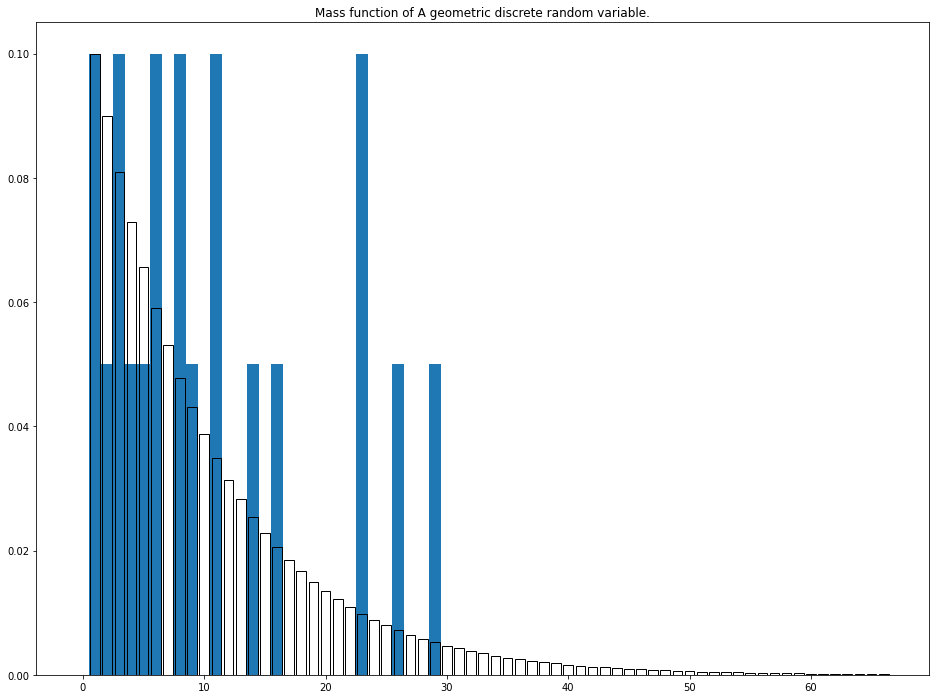

In [40]:
SAMPLE_SIZE = 20
muestra = G.rvs(SAMPLE_SIZE)
K = 50

plt.figure(figsize=(16,12))
plt.hist(muestra, density=1, bins=[k+0.5 for k in range(-1,K+1)])
plot_discrete_dist(G)
plt.show()

De nuevo si la muestra es lo bastante grande el histograma se parece mucho a la función de masa.

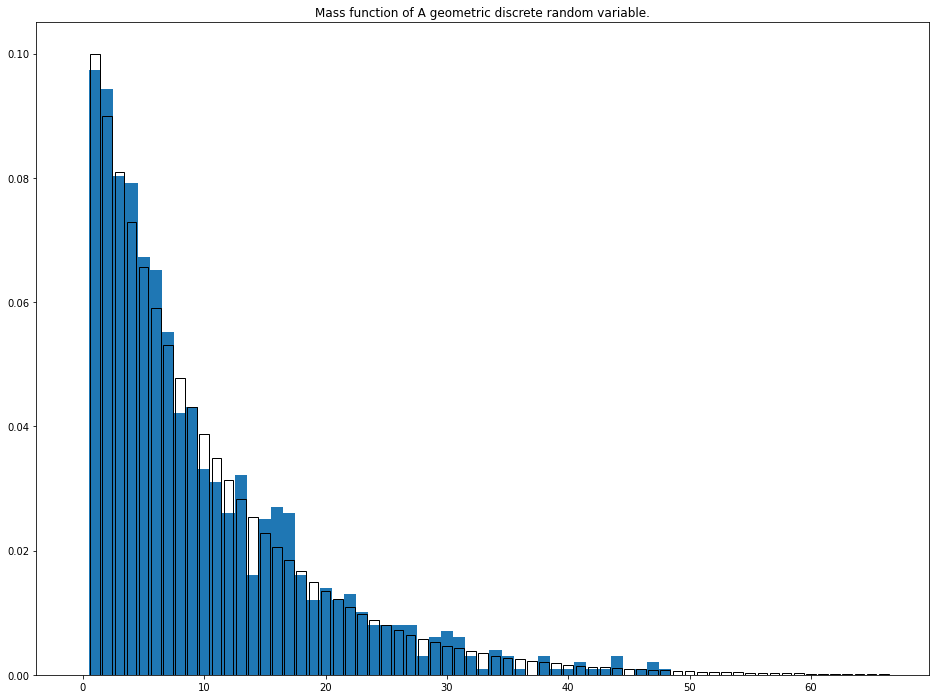

In [41]:
SAMPLE_SIZE = 1000
muestra = G.rvs(SAMPLE_SIZE)
K = 50

plt.figure(figsize=(16,12))
plt.hist(muestra, density=1, bins=[k+0.5 for k in range(-1,K+1)])
plot_discrete_dist(G)
plt.show()

También podemos simular este experimento, pero con un bucle while: repetimos hasta que un número aleatorio entre 0 y 1 sea menor que p (lo que ocurre una proporción **p** de las veces), y contamos el número total de extracciones.

In [43]:
def extraccion_aleatoria_geometrica(p):
    k=1
    while random.random() > p:
        k += 1
    return k

def geometrica_a_mano(p, K):
    return [ 
        extraccion_aleatoria_geometrica(p)
        for _ in range(K)]

geometrica_a_mano(p0, 10)

[8, 1, 1, 3, 13, 17, 10, 4, 1, 1]

In [44]:
G.rvs(10)

array([ 2,  4, 18,  2,  2,  2, 14,  2,  1, 10])

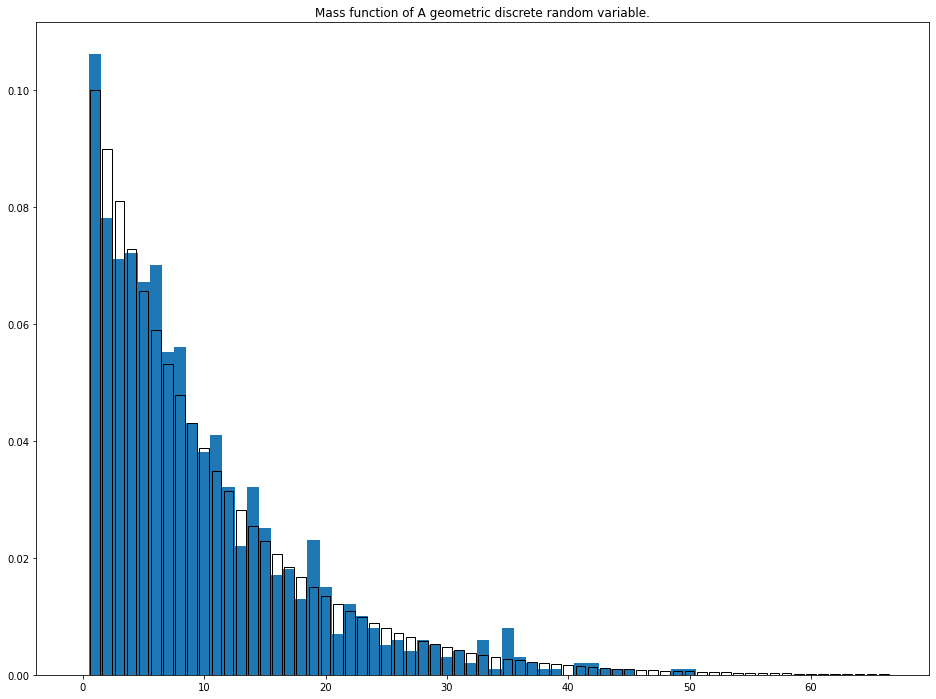

In [45]:
SAMPLE_SIZE = 1000
muestra = geometrica_a_mano(0.1, SAMPLE_SIZE)
K = 50

plt.figure(figsize=(16,12))
plt.hist(muestra, density=1, bins=[k+0.5 for k in range(-1,K+1)])
plot_discrete_dist(G)
plt.show()

## Glosario en inglés

 - **distribución de probabilidad**: *probability distribution*
 - **muestra aleatoria**: *random sample*
 - **histograma**: *histogram*
 - **función de masa**: *probability mass function*
 - **independiente**: *independent*

## Ejercicios

Vamos a fabricar un sistema formado por 8 componentes y que para su funcionamiento requiere al menos 6 disponibles (o sea, tenemos 2 redundancias). Si la probabilidad de que cada componente esté en buenas condiciones es 0.95, calcular la probabilidad de que el sistema funcione.

Las llamadas para conectar en directo con un programa de radio tienen una probabilidad de 0.02 de conectar. Asumiendo que las llamadas son independientes, calcular:

 - La probabilidad de que la primera llamada en conectar sea la número 10.
 - La probabilidad de necesitar más de 5 llamadas para conectar.
 - La media de llamadas necesaria para conectar.